In [1]:
import numpy as np
from data_utils import load_cifar10
import matplotlib.pyplot as plt
from  knn import KNearestNeighbor
x_train,y_train,x_test,y_test=load_cifar10('cifar-10-batches-py')

In [2]:
print('training data shape:',x_train.shape)
print('training labels shape:',y_train.shape)
print('test data shape:',x_test.shape)
print('test labels shape:',y_test.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000,)
test data shape: (10000, 32, 32, 3)
test labels shape: (10000,)


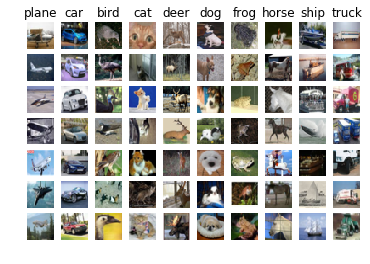

In [3]:
classes=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
num_claesses=len(classes)
samples_per_class=7
for y ,cls in enumerate(classes):
    idxs=np.flatnonzero(y_train==y)
    idxs=np.random.choice(idxs,samples_per_class,replace=False)
    for i ,idx in enumerate(idxs):
        plt_idx=i*num_claesses+y+1
        plt.subplot(samples_per_class,num_claesses,plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i ==0:
            plt.title(cls)
plt.show()

In [4]:
num_training=5000
mask=range(num_training)
x_train=x_train[mask]
y_train=y_train[mask]
num_test=500
mask=range(num_test)
x_test=x_test[mask]
y_test=y_test[mask]

In [9]:
x_train=np.reshape(x_train,(x_train.shape[0],-1))
x_test=np.reshape(x_test,(x_test.shape[0],-1))
print(x_train.shape,x_test.shape)

(5000, 3072) (500, 3072)


In [12]:
classifier=KNearestNeighbor()
classifier.train(x_train,y_train)
dists=classifier.cumpute_distances_two_loops(x_test)
print(dists)

(500, 3072) (5000, 3072)
[[3803.92350081 4210.59603857 5504.0544147  ... 4007.64756434
  4203.28086142 4354.20256764]
 [6336.83367306 5270.28006846 4040.63608854 ... 4829.15334194
  4694.09767687 7768.33347636]
 [5224.83913628 4250.64289255 3773.94581307 ... 3766.81549853
  4464.99921613 6353.57190878]
 ...
 [5366.93534524 5062.8772452  6361.85774755 ... 5126.56824786
  4537.30613911 5920.94156364]
 [3671.92919322 3858.60765044 4846.88157479 ... 3521.04515734
  3182.3673578  4448.65305458]
 [6960.92443573 6083.71366848 6338.13442584 ... 6083.55504619
  4128.24744898 8041.05223214]]


In [13]:
y_test_pred = classifier.predict_labels(dists, k=1)

In [15]:
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print ('got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

got 137 / 500 correct => accuracy: 0.274000


In [16]:
dists_one=classifier.compute_distances_one_loop(x_test)
difference=np.linalg.norm(dists-dists_one,ord='fro')
print('difference was: %f' % difference)

difference was: 0.000000


In [17]:
num_folds=5
k_choices=[1,3,5,8,10,12,15,20,50,100]
x_train_folds=[]
y_train_folds=[]

y_train=y_train.reshape(-1,1) 
x_train_folds=np.array_split(x_train,num_folds)  #1
y_train_folds=np.array_split(y_train,num_folds)

k_to_accuracies={}  #2

for k in k_choices:
    k_to_accuracies.setdefault(k,[])
for i in range(num_folds):   #3
    classifier=KNearestNeighbor()
    x_val_train=np.vstack(x_train_folds[0:i]+x_train_folds[i+1:])   #3.1
    y_val_train = np.vstack(y_train_folds[0:i] + y_train_folds[i + 1:])
    y_val_train=y_val_train[:,0] 
    classifier.train(x_val_train,y_val_train)
    for k in k_choices:
        y_val_pred=classifier.predict(x_train_folds[i],k=k)  #3.2
        num_correct=np.sum(y_val_pred==y_train_folds[i][:,0])
        accuracy=float(num_correct)/len(y_val_pred)
        k_to_accuracies[k]=k_to_accuracies[k]+[accuracy]

for k in sorted(k_to_accuracies):  #4
    sum_accuracy=0
    for accuracy in k_to_accuracies[k]:
        print('k=%d, accuracy=%f' % (k,accuracy))
        sum_accuracy+=accuracy
    print('the average accuracy is :%f' % (sum_accuracy/5)) 

k=1, accuracy=0.263000
k=1, accuracy=0.257000
k=1, accuracy=0.264000
k=1, accuracy=0.278000
k=1, accuracy=0.266000
the average accuracy is :0.265600
k=3, accuracy=0.239000
k=3, accuracy=0.249000
k=3, accuracy=0.240000
k=3, accuracy=0.266000
k=3, accuracy=0.254000
the average accuracy is :0.249600
k=5, accuracy=0.248000
k=5, accuracy=0.266000
k=5, accuracy=0.280000
k=5, accuracy=0.292000
k=5, accuracy=0.280000
the average accuracy is :0.273200
k=8, accuracy=0.262000
k=8, accuracy=0.282000
k=8, accuracy=0.273000
k=8, accuracy=0.290000
k=8, accuracy=0.273000
the average accuracy is :0.276000
k=10, accuracy=0.265000
k=10, accuracy=0.296000
k=10, accuracy=0.276000
k=10, accuracy=0.284000
k=10, accuracy=0.280000
the average accuracy is :0.280200
k=12, accuracy=0.260000
k=12, accuracy=0.295000
k=12, accuracy=0.279000
k=12, accuracy=0.283000
k=12, accuracy=0.280000
the average accuracy is :0.279400
k=15, accuracy=0.252000
k=15, accuracy=0.289000
k=15, accuracy=0.278000
k=15, accuracy=0.282000


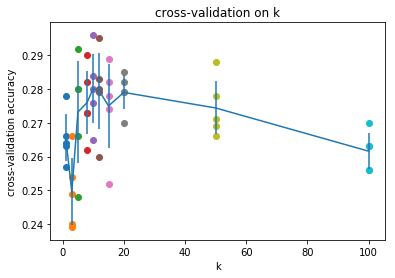

In [18]:
for k in k_choices:
    accuracies=k_to_accuracies[k]
    plt.scatter([k]*len(accuracies),accuracies) 

accuracies_mean=np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std=np.array([np.std(v) for k ,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices,accuracies_mean,yerr=accuracies_std)
plt.title('cross-validation on k')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')
plt.show()

In [21]:
best_k=10
classifier=KNearestNeighbor()
classifier.train(x_train,y_train[:,0])
y_test_pred=classifier.predict(x_test,k=best_k)

num_correct=np.sum(y_test_pred==y_test)
accuracy=float(num_correct)/num_test
print('got %d / %d correct => accuracy: %f' % (num_correct,num_test,accuracy))

got 141 / 500 correct => accuracy: 0.282000
